In [45]:
# Step 1: Load all datasets
import pandas as pd

# File paths
orders_path = "orders_and_shipments.csv"
inventory_path = "inventory.csv"
fulfillment_path = "fulfillment.csv"

# Load datasets
orders_df = pd.read_csv(orders_path)
inventory_df = pd.read_csv(inventory_path)
fulfillment_df = pd.read_csv(fulfillment_path)

# Display the first few rows of each dataset 
print("Orders and Shipments DataFrame:")
display(orders_df.head()) # Display first few rows of orders_df           
print("\nInventory DataFrame:")
display(inventory_df.head()) # Display first few rows of inventory_df
print("\nFulfillment DataFrame:")
display(fulfillment_df.head()) # Display first few rows of fulfillment_df


# Step 3: Preview shapes and missing values
orders_info = {
    "Shape": orders_df.shape,
    "Missing": orders_df.isnull().sum()
}
inventory_info = {
    "Shape": inventory_df.shape,
    "Missing": inventory_df.isnull().sum()
}
fulfillment_info = {
    "Shape": fulfillment_df.shape,
    "Missing": fulfillment_df.isnull().sum()
}

# Combine info for summary
dataset_summary = pd.DataFrame({
    "orders_and_shipments": pd.Series(orders_info),
    "inventory": pd.Series(inventory_info),
    "fulfillment": pd.Series(fulfillment_info)
})

dataset_summary


Orders and Shipments DataFrame:


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200



Inventory DataFrame:


,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648



Fulfillment DataFrame:


,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


,orders_and_shipments,inventory,fulfillment
Shape,"(30871, 24)","(4200, 4)","(118, 2)"
Missing,Order ID 0 Order Item I...,Product Name 0 Year Month ...,Product Name 0 War...


# cleaning orders_and_shipment dataset file 

In [46]:
# Clean column names
orders_df.columns = orders_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Fix year/month/day types
orders_df['order_year'] = orders_df['order_year'].fillna(0).astype(int)
orders_df['order_month'] = orders_df['order_month'].fillna(1).astype(int)
orders_df['order_day'] = orders_df['order_day'].fillna(1).astype(int)

# Create datetime safely
temp_date = orders_df.rename(columns={
    'order_year': 'year',
    'order_month': 'month',
    'order_day': 'day'
})[['year', 'month', 'day']]

orders_df['order_date'] = pd.to_datetime(temp_date, errors='coerce')

# Convert numeric columns
numeric_cols = ['order_quantity', 'gross_sales', 'discount_%', 'profit']
for col in numeric_cols:
    orders_df[col] = pd.to_numeric(orders_df[col], errors='coerce')


save_orders_path = "cleaned_orders_and_shipments.csv"
orders_df['customer_id'] = orders_df['customer_id'].astype(str)
# Save cleaned orders DataFrame
orders_df.to_csv(save_orders_path, index=False)
# Display cleaned orders DataFrame
print("\nCleaned Orders and Shipments DataFrame:")
display(orders_df.head())  # Display first few rows of cleaned orders_df


Cleaned Orders and Shipments DataFrame:


,order_id,order_item_id,order_yearmonth,order_year,order_month,order_day,order_time,order_quantity,product_department,product_category,...,warehouse_country,shipment_year,shipment_month,shipment_day,shipment_mode,shipment_days_-_scheduled,gross_sales,discount_%,profit,order_date
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200,2015-02-21
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200,2015-03-02
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200,2015-04-18
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200,2015-06-10
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200,2015-06-10


# Cleaning inventory file

In [47]:
# Load the inventory dataset
inventory_df = pd.read_csv("inventory.csv") 

# Clean column names: lowercase, strip whitespace, replace spaces with underscores
inventory_df.columns = inventory_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'year_month' column exists and convert it to datetime format (YYYYMM → YYYY-MM-01)
if 'year_month' in inventory_df.columns:
    inventory_df['inventory_date'] = pd.to_datetime(inventory_df['year_month'].astype(str), format='%Y%m', errors='coerce')

# Convert numerical fields to numeric type (int/float)
numeric_cols = ['warehouse_inventory', 'inventory_cost_per_unit']

for col in numeric_cols:
    if col in inventory_df.columns:
        inventory_df[col] = pd.to_numeric(inventory_df[col], errors='coerce')
# Save cleaned inventory DataFrame
save_inventory_path = "cleaned_inventory.csv"
inventory_df.to_csv(save_inventory_path, index=False)
# Display cleaned inventory DataFrame
print("\nCleaned Inventory DataFrame:")
display(inventory_df.head())  


Cleaned Inventory DataFrame:


,product_name,year_month,warehouse_inventory,inventory_cost_per_unit,inventory_date
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,2017-12-01
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,2017-12-01
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,2017-12-01
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,2017-12-01
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,2017-12-01


In [48]:
import pandas as pd

# Load the fulfillment dataset
fulfillment_df = pd.read_csv("fulfillment.csv")  # Update path if needed

# Clean column names: lowercase, strip whitespace, replace spaces with underscores
fulfillment_df.columns = fulfillment_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'warehouse_order_fulfillment_(days)' to numeric if it exists
if 'warehouse_order_fulfillment_(days)' in fulfillment_df.columns:
    fulfillment_df['warehouse_order_fulfillment_(days)'] = pd.to_numeric(
        fulfillment_df['warehouse_order_fulfillment_(days)'],
        errors='coerce'
    )


# Save cleaned fulfillment DataFrame
save_fulfillment_path = "cleaned_fulfillment.csv"
fulfillment_df.to_csv(save_fulfillment_path, index=False)
# Display cleaned fulfillment DataFrame
print("\nCleaned Fulfillment DataFrame:")
display(fulfillment_df.head())  # Display first few rows of cleaned fulfillment_df



Cleaned Fulfillment DataFrame:


,product_name,warehouse_order_fulfillment_(days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [49]:
# Step 1: Clean column names for consistency (already done in earlier steps, repeating to be sure)
orders_df.columns = orders_df.columns.str.strip().str.lower().str.replace(' ', '_')
inventory_df.columns = inventory_df.columns.str.strip().str.lower().str.replace(' ', '_')
fulfillment_df.columns = fulfillment_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Prepare to merge orders_df and inventory_df
# We'll extract YearMonth from order_date to match inventory_df's inventory_date
orders_df['order_yearmonth'] = orders_df['order_date'].dt.to_period('M').astype(str)
inventory_df['year_month'] = pd.to_datetime(inventory_df['year_month'].astype(str), format='%Y%m', errors='coerce')
inventory_df['yearmonth_str'] = inventory_df['year_month'].dt.to_period('M').astype(str)

# Merge orders with inventory on product_name and year-month
merged_df = pd.merge(
    orders_df,
    inventory_df,
    left_on=['product_name', 'order_yearmonth'],
    right_on=['product_name', 'yearmonth_str'],
    how='left'
)

# Step 3: Merge with fulfillment_df on product_name
final_df = pd.merge(
    merged_df,
    fulfillment_df,
    on='product_name',
    how='left'
)

# Step 4: Show a sample of the merged dataset
# Just use standard pandas preview
print("✅ Merged Retail Dataset Preview:")
display(final_df.head())


# Step 5: Save the final merged DataFrame
final_save_path = "final_merged_retail_dataset.csv" 
final_df.to_csv(final_save_path, index=False)



✅ Merged Retail Dataset Preview:


,order_id,order_item_id,order_yearmonth,order_year,order_month,order_day,order_time,order_quantity,product_department,product_category,...,gross_sales,discount_%,profit,order_date,year_month,warehouse_inventory,inventory_cost_per_unit,inventory_date,yearmonth_str,warehouse_order_fulfillment_(days)
0,3535,8793,2015-02,2015,2,21,14:07,1,Fan Shop,Fishing,...,400,0.25,200,2015-02-21,2015-02-01,7,1.68373,2015-02-01,2015-02,4.9
1,4133,10320,2015-03,2015,3,2,07:37,1,Fan Shop,Fishing,...,400,0.09,200,2015-03-02,2015-03-01,153,1.42936,2015-03-01,2015-03,4.9
2,7396,18517,2015-04,2015,4,18,22:47,1,Fan Shop,Fishing,...,400,0.06,200,2015-04-18,2015-04-01,73,0.69765,2015-04-01,2015-04,4.9
3,11026,27608,2015-06,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.15,200,2015-06-10,2015-06-01,76,1.65816,2015-06-01,2015-06,4.9
4,11026,27609,2015-06,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.13,200,2015-06-10,2015-06-01,76,1.65816,2015-06-01,2015-06,4.9


# EDA (Exploratory Data Analysis)

In [50]:
# Step 1: Basic Info and Missing Values

# Dataset size and column types
print(" Shape of dataset:", final_df.shape)
print("\n Column info:")
print(final_df.info())

# Missing values
print("\n Missing values:")
print(final_df.isnull().sum())


 Shape of dataset: (30871, 31)

 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   order_id                            30871 non-null  int64         
 1   order_item_id                       30871 non-null  int64         
 2   order_yearmonth                     30871 non-null  object        
 3   order_year                          30871 non-null  int32         
 4   order_month                         30871 non-null  int32         
 5   order_day                           30871 non-null  int32         
 6   order_time                          30871 non-null  object        
 7   order_quantity                      30871 non-null  int64         
 8   product_department                  30871 non-null  object        
 9   product_category                    30871 non-nu

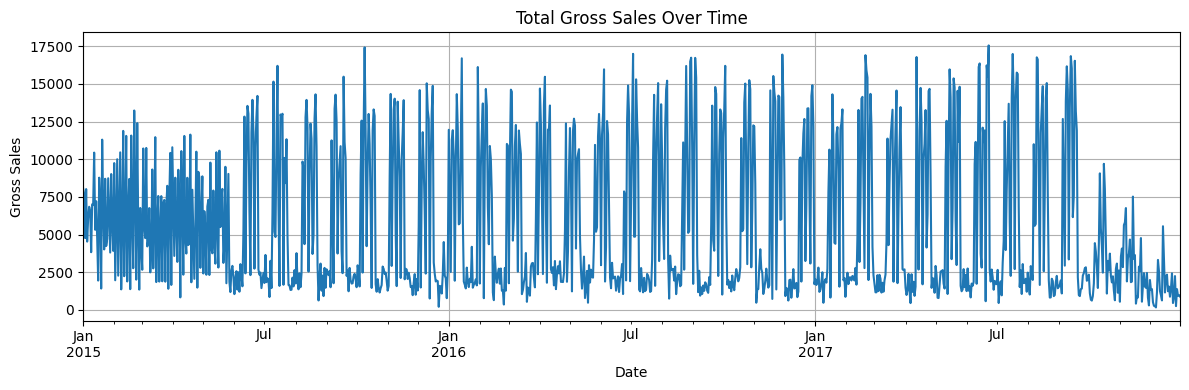

In [51]:
# Step 2: Total Sales Trend Over Time

#  Clean version without emoji to avoid glyph warning
import matplotlib.pyplot as plt

# Group by date and sum gross sales
sales_trend = final_df.groupby('order_date')['gross_sales'].sum()

# Plot
plt.figure(figsize=(12, 4))
sales_trend.plot()
plt.title("Total Gross Sales Over Time") 
plt.xlabel("Date")
plt.ylabel("Gross Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



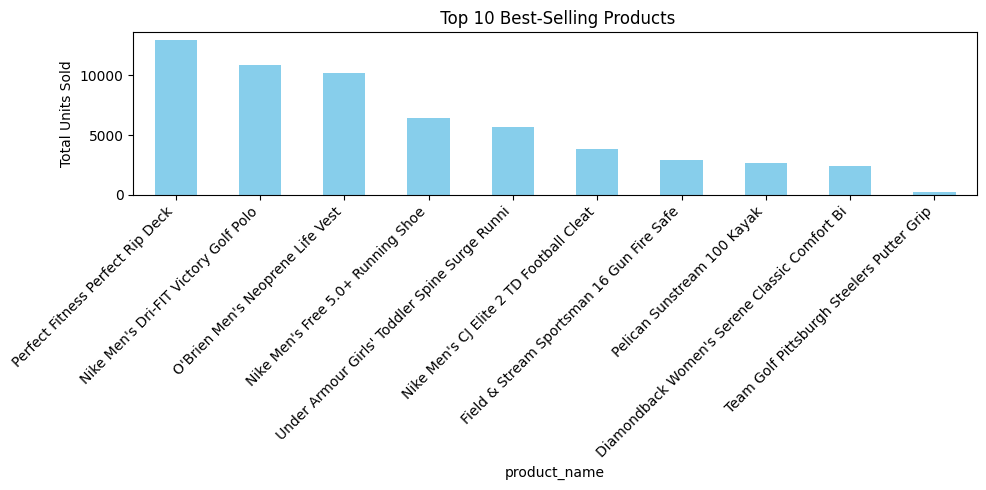

In [52]:
# Step 3: Top 10 Best-Selling Products

top_products = final_df.groupby('product_name')['order_quantity'].sum().sort_values(ascending=False).head(10)

# Plot
top_products.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title(" Top 10 Best-Selling Products")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


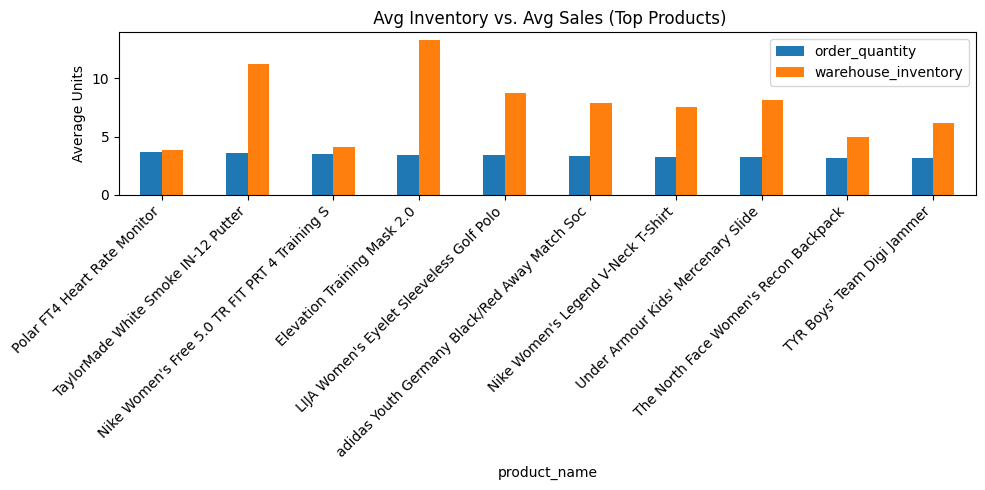

In [53]:
#  Step 4: Inventory vs. Sales

# Average inventory vs. total units sold
inv_vs_sales = final_df.groupby('product_name')[['order_quantity', 'warehouse_inventory']].mean().sort_values(by='order_quantity', ascending=False).head(10)

inv_vs_sales.plot(kind='bar', figsize=(10, 5))
plt.title(" Avg Inventory vs. Avg Sales (Top Products)")
plt.ylabel("Average Units")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


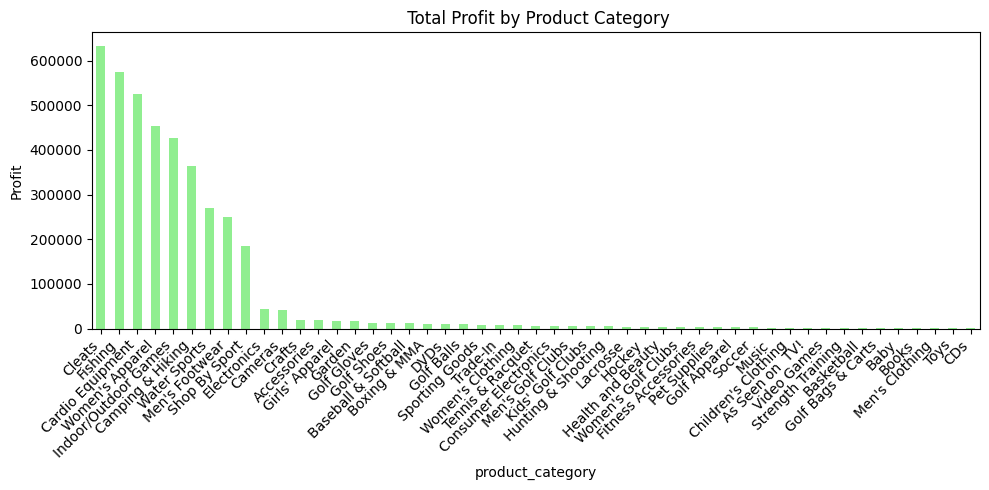

In [54]:
# Step 5: Profit by Product Category
profit_by_category = final_df.groupby('product_category')['profit'].sum().sort_values(ascending=False)

profit_by_category.plot(kind='bar', figsize=(10, 5), color='lightgreen')
plt.title(" Total Profit by Product Category")
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



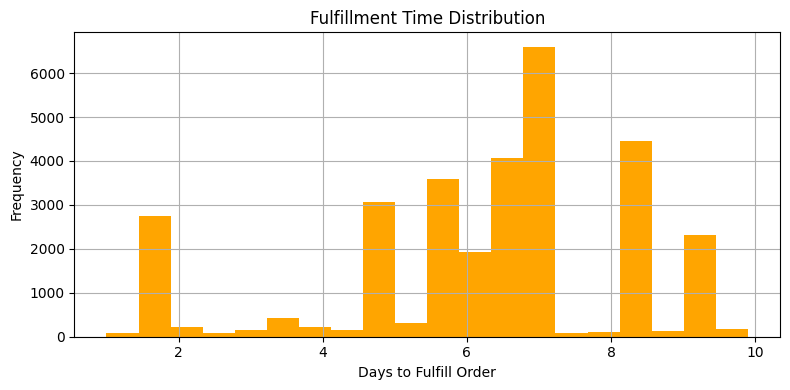

In [55]:
#  Step 6: Fulfillment Time Distribution

plt.figure(figsize=(8, 4))
final_df['warehouse_order_fulfillment_(days)'].dropna().hist(bins=20, color='orange')
plt.title("Fulfillment Time Distribution")
plt.xlabel("Days to Fulfill Order")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


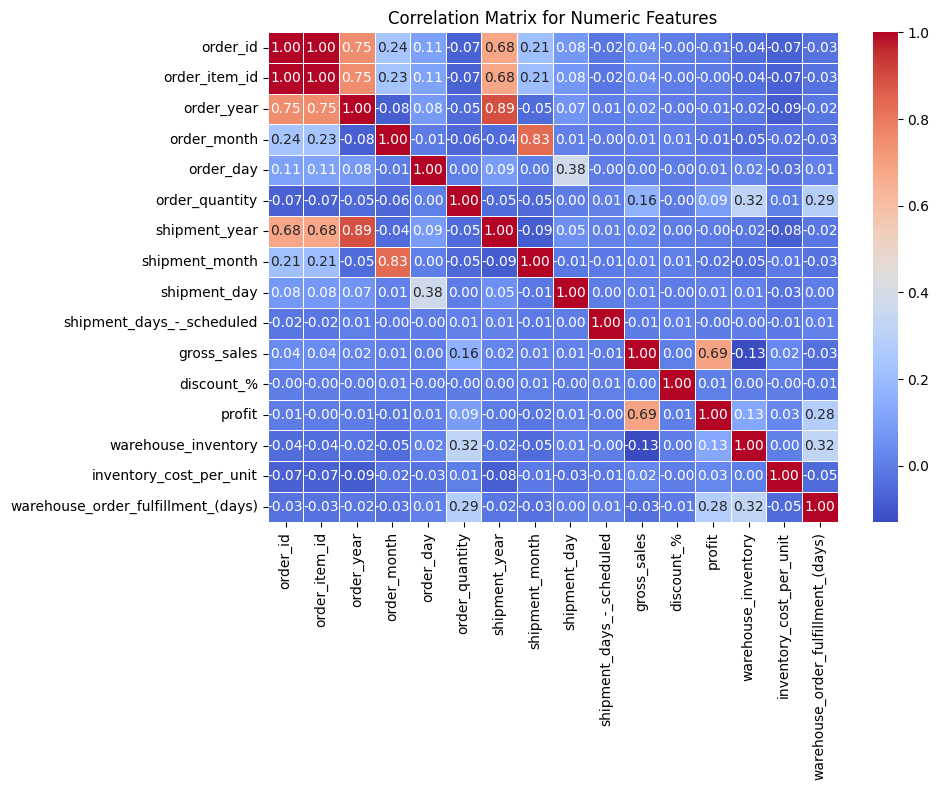

In [56]:
# Correlation Matrix (Heatmap)

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns only
corr_matrix = final_df.corr(numeric_only=True)

# Set figure size and plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features")
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

In [57]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("final_merged_retail_dataset.csv")

# =======================
# 1. Handle Missing Values
# =======================
# Discount: Fill missing with 0 (assume no discount applied)
df['discount_%'].fillna(0, inplace=True)

# Drop columns with too many NaNs (optional - you can skip if not needed)
# Example: drop 'order_time' if all values are missing
if df['order_time'].isnull().sum() > 0.95 * len(df):
    df.drop('order_time', axis=1, inplace=True)

# =======================
# 2. Convert Dates
# =======================
# 2. Convert Dates
# ---------------------

# Convert order_date
df['order_date'] = pd.to_datetime(
    df[['order_year', 'order_month', 'order_day']].rename(
        columns={'order_year': 'year', 'order_month': 'month', 'order_day': 'day'}
    ),
    errors='coerce'  # handle bad/missing dates
)

# Convert shipment_date
df['shipment_date'] = pd.to_datetime(
    df[['shipment_year', 'shipment_month', 'shipment_day']].rename(
        columns={'shipment_year': 'year', 'shipment_month': 'month', 'shipment_day': 'day'}
    ),
    errors='coerce'
)

# Optional: Drop original date parts if no longer needed
# df.drop(columns=['order_year', 'order_month', 'order_day',
#                  'shipment_year', 'shipment_month', 'shipment_day'], inplace=True)

# Optional: Check for conversion issues
print("Missing order_date:", df['order_date'].isnull().sum())
print("Missing shipment_date:", df['shipment_date'].isnull().sum())



# =======================
# 3. Time-Based Features
# =======================
df['order_weekday'] = df['order_date'].dt.dayofweek
df['order_week'] = df['order_date'].dt.isocalendar().week
df['is_weekend'] = df['order_weekday'].isin([5, 6]).astype(int)

# =======================
# 4. Categorical Encoding
# =======================
# Encode product_category and product_department as numerical labels
for col in ['product_category', 'product_department']:
    df[col] = df[col].astype('category').cat.codes

# Optional: Encode customer_region/country if needed
df['customer_country'] = df['customer_country'].astype('category').cat.codes

# =======================
# 5. Drop Unused Columns
# =======================
# Drop any irrelevant columns
cols_to_drop = ['order_id', 'order_item_id', 'order_yearmonth', 'shipment_mode',
                'product_name', 'customer_id', 'customer_market', 'warehouse_country',
                'shipment_year', 'shipment_month', 'shipment_day']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# =======================
# 6. Aggregate Demand (Optional)
# =======================
# If you're forecasting per product per day
df_daily = df.groupby(['product_category', 'product_department', 'order_date']).agg({
    'order_quantity': 'sum',
    'gross_sales': 'sum',
    'discount_%': 'mean',
    'is_weekend': 'first',
    'order_weekday': 'first'
}).reset_index()

# Final dataset ready for modeling
print(df_daily.head())


Missing order_date: 0
Missing shipment_date: 0
   product_category  product_department order_date  order_quantity  \
0                 0                   8 2015-01-11               3   
1                 0                   8 2015-01-14               4   
2                 0                   8 2015-01-18               2   
3                 0                   8 2015-01-21               1   
4                 0                   8 2015-01-27               3   

   gross_sales  discount_%  is_weekend  order_weekday  
0           75        0.02           1              6  
1          100        0.05           0              2  
2           50        0.17           1              6  
3           25        0.02           0              2  
4           75        0.25           0              1  


C:\Users\ratho\AppData\Local\Temp\ipykernel_7820\488276178.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_%'].fillna(0, inplace=True)


In [58]:
# 1. Create Time-Based Features
df['order_weekday'] = df['order_date'].dt.dayofweek  # 0=Monday
df['is_weekend'] = df['order_weekday'].isin([5, 6]).astype(int)

# Days between shipment and order
df['delivery_time_days'] = (df['shipment_date'] - df['order_date']).dt.days

# 2. Drop any future or invalid delivery times (optional but recommended)
df = df[df['delivery_time_days'].notnull()]
df = df[df['delivery_time_days'] >= 0]  # remove negatives if they exist

# 3. One-Hot Encode Categorical Features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Fill any remaining missing numeric values (if any)
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 5. Final check
print("Final shape:", df.shape)
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False).head())


# Feature: delivery week of year
df['order_weekofyear'] = df['order_date'].dt.isocalendar().week

# Feature: month, quarter, etc.
df['order_month'] = df['order_date'].dt.month
df['order_quarter'] = df['order_date'].dt.quarter



Final shape: (28136, 1586)
Missing values:
 order_year          0
order_time_17:26    0
order_time_17:24    0
order_time_17:23    0
order_time_17:22    0
dtype: int64


# training and testing with ML MODELS 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['order_dayofweek'] = df['order_date'].dt.dayofweek
df['order_month'] = df['order_date'].dt.month
df['shipment_dayofweek'] = df['shipment_date'].dt.dayofweek
df['shipment_month'] = df['shipment_date'].dt.month

# Now drop original datetime columns
df = df.drop(columns=['order_date', 'shipment_date'])


# 1. Define target and features
target = 'delivery_time_days'  # you can change this if you're forecasting demand instead
X = df.drop(columns=[target])
y = df[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features (optional but useful for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# 5. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 6. Evaluation Function
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))

# 7. Evaluate both
evaluate_model(y_test, y_pred_lr, "Linear Regression (Baseline)")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


In [ ]:
! pip install prophet
 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print(df.columns.tolist())



['order_id', 'order_item_id', 'order_yearmonth', 'order_year', 'order_month', 'order_day', 'order_time', 'order_quantity', 'product_department', 'product_category', 'product_name', 'customer_id', 'customer_market', 'customer_region', 'customer_country', 'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day', 'shipment_mode', 'shipment_days_-_scheduled', 'gross_sales', 'discount_%', 'profit', 'order_date', 'year_month', 'warehouse_inventory', 'inventory_cost_per_unit', 'inventory_date', 'yearmonth_str', 'warehouse_order_fulfillment_(days)']


In [ ]:
from prophet import Prophet
import pandas as pd

# Load the cleaned and merged dataset
df = pd.read_csv("final_merged_retail_dataset.csv")

# Convert date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Prepare data for Prophet
# Assuming you're forecasting 'quantity' and using 'order_date' as time
df_prophet = df[['order_date', 'order_quantity']].rename(columns={'order_date': 'ds', 'order_quantity': 'y'})


# Drop NA values just in case
df_prophet = df_prophet.dropna()

# Initialize Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # forecast 30 days into the future
forecast = model.predict(future)

# Display forecast tail
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


13:01:07 - cmdstanpy - INFO - Chain [1] start processing
13:01:14 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1116,2018-01-21,1.249803,-0.545086,3.180886
1117,2018-01-22,1.239342,-0.705328,3.006923
1118,2018-01-23,1.231867,-0.627819,3.029233
1119,2018-01-24,1.213280,-0.639565,3.049436
1120,2018-01-25,1.234734,-0.555068,3.089195
1121,2018-01-26,1.223352,-0.643239,3.102296
1122,2018-01-27,1.222451,-0.590716,3.130682
1123,2018-01-28,1.213493,-0.790420,3.218029
1124,2018-01-29,1.205787,-0.638284,3.090039
1125,2018-01-30,1.201541,-0.744085,3.170309


13:01:19 - cmdstanpy - INFO - Chain [1] start processing
13:01:26 - cmdstanpy - INFO - Chain [1] done processing


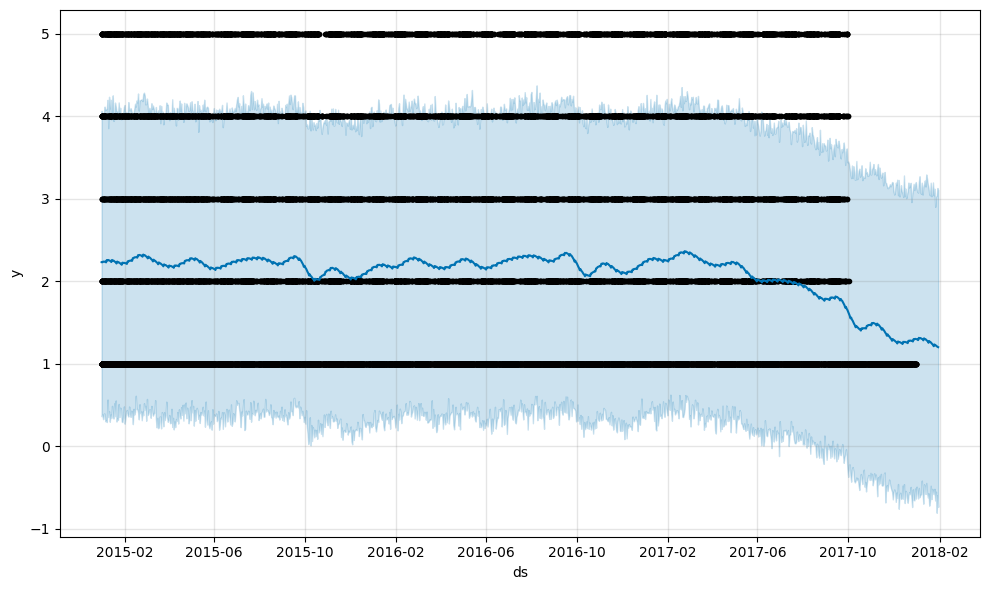

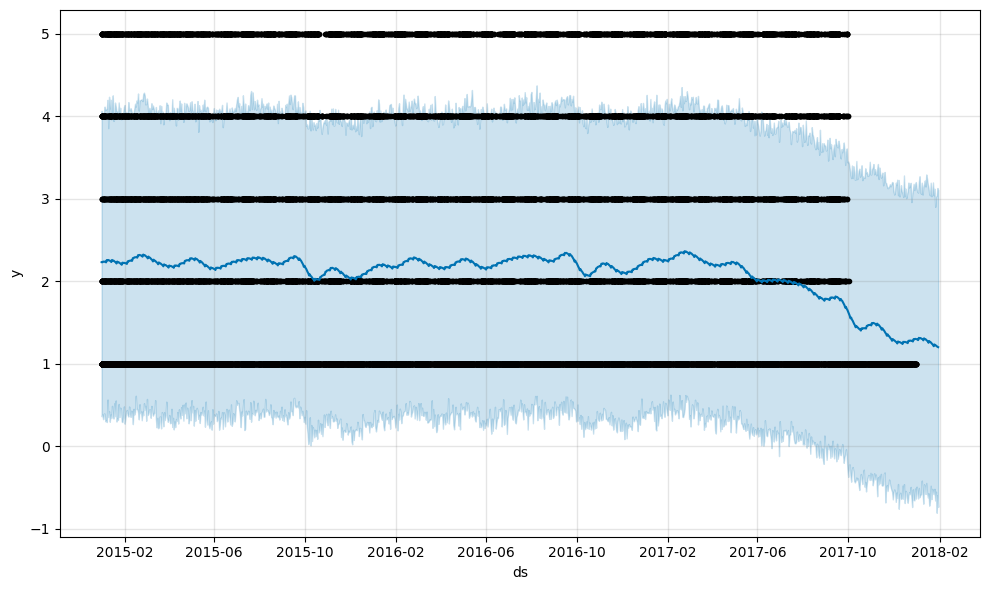

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)  # change period as needed
forecast = model.predict(future)

model.plot(forecast)


In [ ]:
df.columns

Index(['order_id', 'order_item_id', 'order_yearmonth', 'order_year',
       'order_month', 'order_day', 'order_time', 'order_quantity',
       'product_department', 'product_category', 'product_name', 'customer_id',
       'customer_market', 'customer_region', 'customer_country',
       'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day',
       'shipment_mode', 'shipment_days_-_scheduled', 'gross_sales',
       'discount_%', 'profit', 'ds', 'year_month', 'warehouse_inventory',
       'inventory_cost_per_unit', 'inventory_date', 'yearmonth_str',
       'warehouse_order_fulfillment_(days)'],
      dtype='object')

In [ ]:
df = df.rename(columns={'gross_sales': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

from prophet import Prophet
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)  # change period as needed
forecast = model.predict(future)
print(df.columns.tolist())


13:22:58 - cmdstanpy - INFO - Chain [1] start processing
13:23:04 - cmdstanpy - INFO - Chain [1] done processing


['order_id', 'order_item_id', 'order_yearmonth', 'order_year', 'order_month', 'order_day', 'order_time', 'order_quantity', 'product_department', 'product_category', 'product_name', 'customer_id', 'customer_market', 'customer_region', 'customer_country', 'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day', 'shipment_mode', 'shipment_days_-_scheduled', 'y', 'discount_%', 'profit', 'ds', 'year_month', 'warehouse_inventory', 'inventory_cost_per_unit', 'inventory_date', 'yearmonth_str', 'warehouse_order_fulfillment_(days)']
